# Prototype/Model Based Clustering

## K-means

In [1]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kemlglearn.cluster import Leader, KMedoidsFlexible
from kemlglearn.datasets import make_blobs
from numpy.random import normal
import numpy as np

from __future__ import print_function

%matplotlib inline

iris = datasets.load_iris()

We will play again with the iris dataset, now using K-means. In this case we will look for 3 clusters

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 15 µs


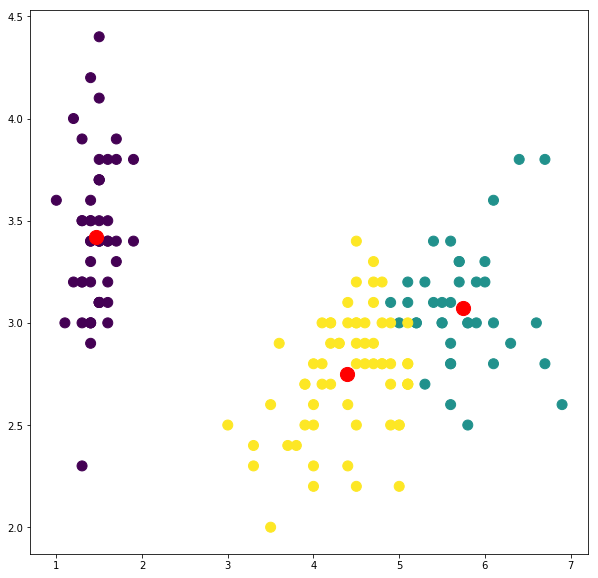

In [2]:
km = KMeans(n_clusters=3)
%time {km.fit(iris['data'])}
labels = km.predict(iris['data'])
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,1], c='r', s=200);

Results are a little bit worse than hierarchical clustering

In [3]:
print(adjusted_mutual_info_score(iris['target'], labels))

0.7483723933229484


## K-medoids

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 12.9 µs


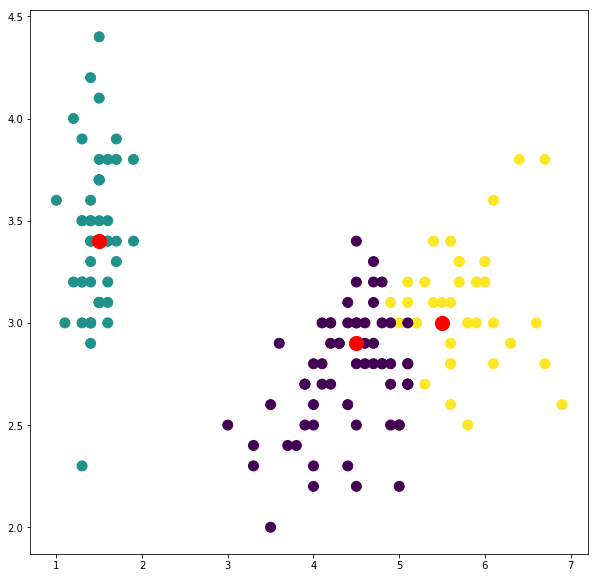

In [4]:
kmd = KMedoidsFlexible(n_clusters=3)
%time {kmd.fit(iris['data'])}
labels = kmd.predict(iris['data'])
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(kmd.cluster_medoids_[:,2], kmd.cluster_medoids_[:,1], c='r', s=200);


In [5]:
print(adjusted_mutual_info_score(iris['target'], labels))

0.7483723933229485


## GMM

Now for Gaussian Mixture Models, first using spherical clusters as estimation method.

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 18.6 µs


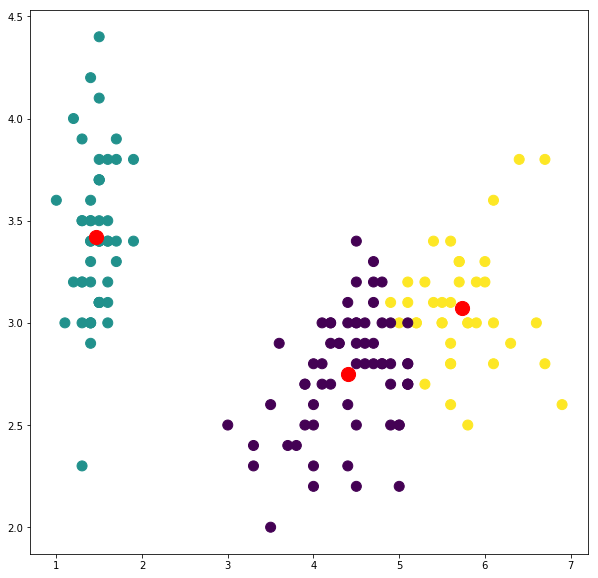

In [6]:
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
%time {gmm.fit(iris['data'])}
labels = gmm.predict(iris['data'])
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100);
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200);

These are the results of the AMI and the final BIC of the model

In [7]:
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
print("BIC=", gmm.bic(iris['data']))

AMI= 0.7483723933229485
BIC= 854.985992500252


As expected the results is comparable to the one from K-means.

Let's change the method of estimation assuming independent attributes (diagonal covariance).

CPU times: user 16 µs, sys: 4 µs, total: 20 µs
Wall time: 25.3 µs


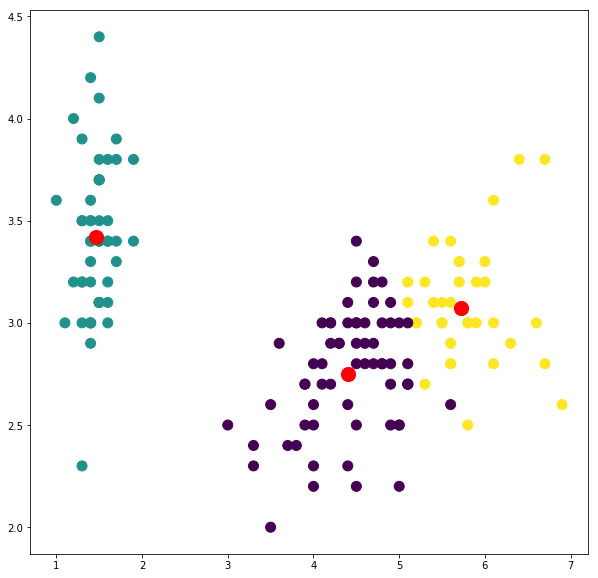

In [8]:
gmm = GaussianMixture(n_components=3, covariance_type='diag')
%time {gmm.fit(iris['data'])}
labels = gmm.predict(iris['data'])
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200);

These are the results of the AMI and the final BIC of the model

In [9]:
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
print("BIC=", gmm.bic(iris['data']))

AMI= 0.7934250515435665
BIC= 746.7767997660027


Now we change to the full model, with dependent attributes

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 19.1 µs


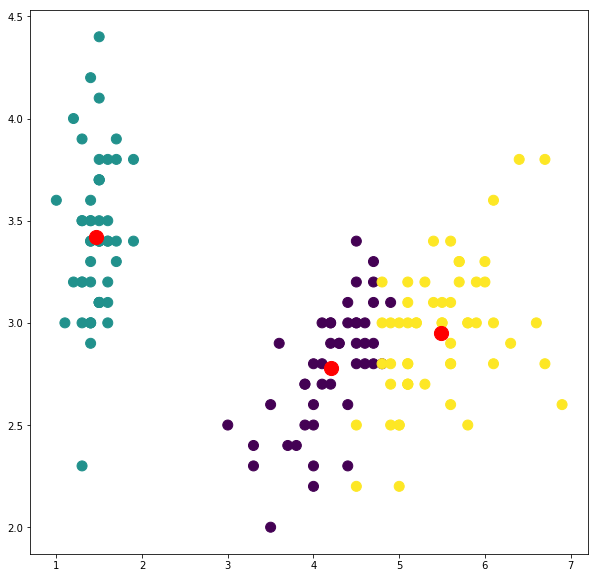

In [10]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
%time {gmm.fit(iris['data'])}
labels = gmm.predict(iris['data'])
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200);

These are the results of the AMI and the final BIC of the model

In [11]:
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
print("BIC=", gmm.bic(iris['data']))

AMI= 0.8970537476260634
BIC= 582.4842410684013


This is now the **best model** we have found

## Leader Algorithm

Now we use the Leader Algorithm (from kemlglearn), the main problem is to guess a radius that results in the number of clusters we want and the quality could not be the best, the upside is that this algorithm is faster than the rest.

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 19.1 µs
AMI= 0.7842528489695738


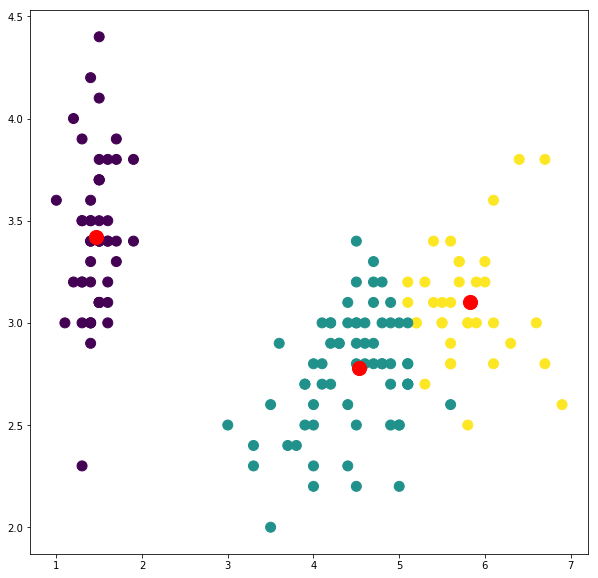

In [12]:
r=2.5

lead = Leader(radius=r)
%time {lead.fit(iris['data'])}
labels = lead.predict(iris['data'])
print("AMI=", adjusted_mutual_info_score(iris['target'], labels))
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(lead.cluster_centers_[:,2], lead.cluster_centers_[:,1], c='r', s=200);